In [45]:
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

In [46]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [48]:
#learning_rate = 0.001
inputs_ = tf.placeholder(tf.float32,[None,28,28,1])
targets_ = tf.placeholder(tf.float32,[None,28,28,1])

In [49]:
def lrelu(x,alpha=0.1):
    return tf.maximum(alpha*x,x)

In [50]:
### Encoder
with tf.name_scope('en-convolutions'):
    conv1 = tf.layers.conv2d(inputs_,filters=32,kernel_size=(3,3),strides=(1,1),padding='SAME',use_bias=True,activation=lrelu,name='conv1')
# Now 28x28x32
with tf.name_scope('en-pooling'):
    maxpool1 = tf.layers.max_pooling2d(conv1,pool_size=(2,2),strides=(2,2),name='pool1')
# Now 14x14x32
with tf.name_scope('en-convolutions'):
    conv2 = tf.layers.conv2d(maxpool1,filters=32,kernel_size=(3,3),strides=(1,1),padding='SAME',use_bias=True,activation=lrelu,name='conv2')
# Now 14x14x32
with tf.name_scope('encoding'):
    encoded = tf.layers.max_pooling2d(conv2,pool_size=(2,2),strides=(2,2),name='encoding')
# Now 7x7x32.
#latent space

In [51]:
### Decoder
with tf.name_scope('decoder'):
    conv3 = tf.layers.conv2d(encoded,filters=32,kernel_size=(3,3),strides=(1,1),name='conv3',padding='SAME',use_bias=True,activation=lrelu)
#Now 7x7x32        
    upsample1 = tf.layers.conv2d_transpose(conv3,filters=32,kernel_size=3,padding='same',strides=2,name='upsample1')
# Now 14x14x32
    upsample2 = tf.layers.conv2d_transpose(conv4,filters=32,kernel_size=3,padding='same',strides=2,name='upsample2')
# Now 28x28x32
    logits = tf.layers.conv2d(conv5,filters=1,kernel_size=(3,3),strides=(1,1),name='logits',padding='SAME',use_bias=True)
#Now 28x28x1
# Pass logits through sigmoid to get reconstructed image
    decoded = tf.sigmoid(logits,name='recon')

In [52]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)

learning_rate=tf.placeholder(tf.float32)
cost = tf.reduce_mean(loss)  #cost
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost) #optimizer

('Epoch: 1/5...', 'Training loss: 0.6960', 'Validation loss: 0.6864')
('Epoch: 1/5...', 'Training loss: 0.6863', 'Validation loss: 0.6776')
('Epoch: 1/5...', 'Training loss: 0.6777', 'Validation loss: 0.6666')
('Epoch: 1/5...', 'Training loss: 0.6663', 'Validation loss: 0.6513')
('Epoch: 1/5...', 'Training loss: 0.6523', 'Validation loss: 0.6328')
('Epoch: 1/5...', 'Training loss: 0.6322', 'Validation loss: 0.6070')
('Epoch: 1/5...', 'Training loss: 0.6073', 'Validation loss: 0.5777')
('Epoch: 1/5...', 'Training loss: 0.5760', 'Validation loss: 0.5434')
('Epoch: 1/5...', 'Training loss: 0.5435', 'Validation loss: 0.5151')
('Epoch: 1/5...', 'Training loss: 0.5200', 'Validation loss: 0.5125')
('Epoch: 1/5...', 'Training loss: 0.5156', 'Validation loss: 0.5315')
('Epoch: 1/5...', 'Training loss: 0.5288', 'Validation loss: 0.5396')
('Epoch: 1/5...', 'Training loss: 0.5435', 'Validation loss: 0.5358')
('Epoch: 1/5...', 'Training loss: 0.5301', 'Validation loss: 0.5150')
('Epoch: 1/5...', 'T

('Epoch: 1/5...', 'Training loss: 0.1450', 'Validation loss: 0.1441')
('Epoch: 1/5...', 'Training loss: 0.1467', 'Validation loss: 0.1488')
('Epoch: 1/5...', 'Training loss: 0.1514', 'Validation loss: 0.1498')
('Epoch: 1/5...', 'Training loss: 0.1476', 'Validation loss: 0.1466')
('Epoch: 1/5...', 'Training loss: 0.1508', 'Validation loss: 0.1485')
('Epoch: 1/5...', 'Training loss: 0.1418', 'Validation loss: 0.1411')
('Epoch: 1/5...', 'Training loss: 0.1496', 'Validation loss: 0.1487')
('Epoch: 1/5...', 'Training loss: 0.1524', 'Validation loss: 0.1530')
('Epoch: 1/5...', 'Training loss: 0.1479', 'Validation loss: 0.1470')
('Epoch: 1/5...', 'Training loss: 0.1484', 'Validation loss: 0.1508')
('Epoch: 1/5...', 'Training loss: 0.1474', 'Validation loss: 0.1468')
('Epoch: 1/5...', 'Training loss: 0.1445', 'Validation loss: 0.1434')
('Epoch: 1/5...', 'Training loss: 0.1403', 'Validation loss: 0.1364')
('Epoch: 1/5...', 'Training loss: 0.1471', 'Validation loss: 0.1436')
('Epoch: 1/5...', 'T

('Epoch: 1/5...', 'Training loss: 0.1195', 'Validation loss: 0.1181')
('Epoch: 1/5...', 'Training loss: 0.1273', 'Validation loss: 0.1259')
('Epoch: 1/5...', 'Training loss: 0.1226', 'Validation loss: 0.1242')
('Epoch: 1/5...', 'Training loss: 0.1223', 'Validation loss: 0.1220')
('Epoch: 1/5...', 'Training loss: 0.1248', 'Validation loss: 0.1231')
('Epoch: 1/5...', 'Training loss: 0.1221', 'Validation loss: 0.1233')
('Epoch: 1/5...', 'Training loss: 0.1235', 'Validation loss: 0.1210')
('Epoch: 1/5...', 'Training loss: 0.1253', 'Validation loss: 0.1238')
('Epoch: 1/5...', 'Training loss: 0.1283', 'Validation loss: 0.1264')
('Epoch: 1/5...', 'Training loss: 0.1225', 'Validation loss: 0.1203')
('Epoch: 1/5...', 'Training loss: 0.1228', 'Validation loss: 0.1209')
('Epoch: 1/5...', 'Training loss: 0.1224', 'Validation loss: 0.1229')
('Epoch: 1/5...', 'Training loss: 0.1236', 'Validation loss: 0.1255')
('Epoch: 1/5...', 'Training loss: 0.1249', 'Validation loss: 0.1250')
('Epoch: 1/5...', 'T

('Epoch: 1/5...', 'Training loss: 0.1173', 'Validation loss: 0.1172')
('Epoch: 1/5...', 'Training loss: 0.1187', 'Validation loss: 0.1188')
('Epoch: 1/5...', 'Training loss: 0.1186', 'Validation loss: 0.1217')
('Epoch: 1/5...', 'Training loss: 0.1160', 'Validation loss: 0.1168')
('Epoch: 1/5...', 'Training loss: 0.1172', 'Validation loss: 0.1173')
('Epoch: 1/5...', 'Training loss: 0.1185', 'Validation loss: 0.1196')
('Epoch: 1/5...', 'Training loss: 0.1229', 'Validation loss: 0.1206')
('Epoch: 1/5...', 'Training loss: 0.1123', 'Validation loss: 0.1133')
('Epoch: 1/5...', 'Training loss: 0.1228', 'Validation loss: 0.1227')
('Epoch: 1/5...', 'Training loss: 0.1182', 'Validation loss: 0.1179')
('Epoch: 1/5...', 'Training loss: 0.1226', 'Validation loss: 0.1207')
('Epoch: 1/5...', 'Training loss: 0.1220', 'Validation loss: 0.1210')
('Epoch: 1/5...', 'Training loss: 0.1161', 'Validation loss: 0.1150')
('Epoch: 1/5...', 'Training loss: 0.1192', 'Validation loss: 0.1185')
('Epoch: 1/5...', 'T

('Epoch: 2/5...', 'Training loss: 0.1158', 'Validation loss: 0.1174')
('Epoch: 2/5...', 'Training loss: 0.1155', 'Validation loss: 0.1135')
('Epoch: 2/5...', 'Training loss: 0.1131', 'Validation loss: 0.1142')
('Epoch: 2/5...', 'Training loss: 0.1156', 'Validation loss: 0.1177')
('Epoch: 2/5...', 'Training loss: 0.1168', 'Validation loss: 0.1154')
('Epoch: 2/5...', 'Training loss: 0.1135', 'Validation loss: 0.1132')
('Epoch: 2/5...', 'Training loss: 0.1156', 'Validation loss: 0.1150')
('Epoch: 2/5...', 'Training loss: 0.1135', 'Validation loss: 0.1142')
('Epoch: 2/5...', 'Training loss: 0.1127', 'Validation loss: 0.1106')
('Epoch: 2/5...', 'Training loss: 0.1148', 'Validation loss: 0.1164')
('Epoch: 2/5...', 'Training loss: 0.1116', 'Validation loss: 0.1117')
('Epoch: 2/5...', 'Training loss: 0.1145', 'Validation loss: 0.1143')
('Epoch: 2/5...', 'Training loss: 0.1109', 'Validation loss: 0.1128')
('Epoch: 2/5...', 'Training loss: 0.1095', 'Validation loss: 0.1101')
('Epoch: 2/5...', 'T

('Epoch: 2/5...', 'Training loss: 0.1141', 'Validation loss: 0.1148')
('Epoch: 2/5...', 'Training loss: 0.1142', 'Validation loss: 0.1135')
('Epoch: 2/5...', 'Training loss: 0.1146', 'Validation loss: 0.1154')
('Epoch: 2/5...', 'Training loss: 0.1158', 'Validation loss: 0.1156')
('Epoch: 2/5...', 'Training loss: 0.1119', 'Validation loss: 0.1108')
('Epoch: 2/5...', 'Training loss: 0.1091', 'Validation loss: 0.1120')
('Epoch: 2/5...', 'Training loss: 0.1132', 'Validation loss: 0.1121')
('Epoch: 2/5...', 'Training loss: 0.1129', 'Validation loss: 0.1120')
('Epoch: 2/5...', 'Training loss: 0.1107', 'Validation loss: 0.1120')
('Epoch: 2/5...', 'Training loss: 0.1113', 'Validation loss: 0.1120')
('Epoch: 2/5...', 'Training loss: 0.1133', 'Validation loss: 0.1126')
('Epoch: 2/5...', 'Training loss: 0.1109', 'Validation loss: 0.1103')
('Epoch: 2/5...', 'Training loss: 0.1128', 'Validation loss: 0.1121')
('Epoch: 2/5...', 'Training loss: 0.1085', 'Validation loss: 0.1119')
('Epoch: 2/5...', 'T

('Epoch: 2/5...', 'Training loss: 0.1078', 'Validation loss: 0.1085')
('Epoch: 2/5...', 'Training loss: 0.1171', 'Validation loss: 0.1143')
('Epoch: 2/5...', 'Training loss: 0.1072', 'Validation loss: 0.1088')
('Epoch: 2/5...', 'Training loss: 0.1119', 'Validation loss: 0.1104')
('Epoch: 2/5...', 'Training loss: 0.1081', 'Validation loss: 0.1081')
('Epoch: 2/5...', 'Training loss: 0.1092', 'Validation loss: 0.1077')
('Epoch: 2/5...', 'Training loss: 0.1133', 'Validation loss: 0.1124')
('Epoch: 2/5...', 'Training loss: 0.1127', 'Validation loss: 0.1142')
('Epoch: 2/5...', 'Training loss: 0.1178', 'Validation loss: 0.1160')
('Epoch: 2/5...', 'Training loss: 0.1102', 'Validation loss: 0.1090')
('Epoch: 2/5...', 'Training loss: 0.1107', 'Validation loss: 0.1108')
('Epoch: 2/5...', 'Training loss: 0.1135', 'Validation loss: 0.1154')
('Epoch: 2/5...', 'Training loss: 0.1119', 'Validation loss: 0.1132')
('Epoch: 2/5...', 'Training loss: 0.1144', 'Validation loss: 0.1152')
('Epoch: 2/5...', 'T

('Epoch: 2/5...', 'Training loss: 0.1090', 'Validation loss: 0.1068')
('Epoch: 2/5...', 'Training loss: 0.1114', 'Validation loss: 0.1104')
('Epoch: 2/5...', 'Training loss: 0.1104', 'Validation loss: 0.1123')
('Epoch: 2/5...', 'Training loss: 0.1053', 'Validation loss: 0.1067')
('Epoch: 2/5...', 'Training loss: 0.1072', 'Validation loss: 0.1085')
('Epoch: 2/5...', 'Training loss: 0.1108', 'Validation loss: 0.1099')
('Epoch: 2/5...', 'Training loss: 0.1145', 'Validation loss: 0.1141')
('Epoch: 2/5...', 'Training loss: 0.1125', 'Validation loss: 0.1136')
('Epoch: 2/5...', 'Training loss: 0.1101', 'Validation loss: 0.1092')
('Epoch: 2/5...', 'Training loss: 0.1113', 'Validation loss: 0.1130')
('Epoch: 2/5...', 'Training loss: 0.1111', 'Validation loss: 0.1097')
('Epoch: 2/5...', 'Training loss: 0.1084', 'Validation loss: 0.1092')
('Epoch: 2/5...', 'Training loss: 0.1079', 'Validation loss: 0.1080')
('Epoch: 2/5...', 'Training loss: 0.1085', 'Validation loss: 0.1084')
('Epoch: 2/5...', 'T

('Epoch: 3/5...', 'Training loss: 0.1097', 'Validation loss: 0.1099')
('Epoch: 3/5...', 'Training loss: 0.1112', 'Validation loss: 0.1114')
('Epoch: 3/5...', 'Training loss: 0.1101', 'Validation loss: 0.1131')
('Epoch: 3/5...', 'Training loss: 0.1104', 'Validation loss: 0.1106')
('Epoch: 3/5...', 'Training loss: 0.1090', 'Validation loss: 0.1073')
('Epoch: 3/5...', 'Training loss: 0.1117', 'Validation loss: 0.1114')
('Epoch: 3/5...', 'Training loss: 0.1126', 'Validation loss: 0.1110')
('Epoch: 3/5...', 'Training loss: 0.1107', 'Validation loss: 0.1082')
('Epoch: 3/5...', 'Training loss: 0.1088', 'Validation loss: 0.1094')
('Epoch: 3/5...', 'Training loss: 0.1074', 'Validation loss: 0.1093')
('Epoch: 3/5...', 'Training loss: 0.1115', 'Validation loss: 0.1099')
('Epoch: 3/5...', 'Training loss: 0.1111', 'Validation loss: 0.1124')
('Epoch: 3/5...', 'Training loss: 0.1077', 'Validation loss: 0.1094')
('Epoch: 3/5...', 'Training loss: 0.1088', 'Validation loss: 0.1101')
('Epoch: 3/5...', 'T

('Epoch: 3/5...', 'Training loss: 0.1132', 'Validation loss: 0.1118')
('Epoch: 3/5...', 'Training loss: 0.1104', 'Validation loss: 0.1092')
('Epoch: 3/5...', 'Training loss: 0.1061', 'Validation loss: 0.1062')
('Epoch: 3/5...', 'Training loss: 0.1138', 'Validation loss: 0.1143')
('Epoch: 3/5...', 'Training loss: 0.1059', 'Validation loss: 0.1071')
('Epoch: 3/5...', 'Training loss: 0.1069', 'Validation loss: 0.1068')
('Epoch: 3/5...', 'Training loss: 0.1077', 'Validation loss: 0.1070')
('Epoch: 3/5...', 'Training loss: 0.1104', 'Validation loss: 0.1112')
('Epoch: 3/5...', 'Training loss: 0.1053', 'Validation loss: 0.1071')
('Epoch: 3/5...', 'Training loss: 0.1104', 'Validation loss: 0.1121')
('Epoch: 3/5...', 'Training loss: 0.1115', 'Validation loss: 0.1113')
('Epoch: 3/5...', 'Training loss: 0.1091', 'Validation loss: 0.1098')
('Epoch: 3/5...', 'Training loss: 0.1124', 'Validation loss: 0.1115')
('Epoch: 3/5...', 'Training loss: 0.1071', 'Validation loss: 0.1074')
('Epoch: 3/5...', 'T

('Epoch: 3/5...', 'Training loss: 0.1100', 'Validation loss: 0.1086')
('Epoch: 3/5...', 'Training loss: 0.1065', 'Validation loss: 0.1070')
('Epoch: 3/5...', 'Training loss: 0.1068', 'Validation loss: 0.1074')
('Epoch: 3/5...', 'Training loss: 0.1054', 'Validation loss: 0.1086')
('Epoch: 3/5...', 'Training loss: 0.1099', 'Validation loss: 0.1076')
('Epoch: 3/5...', 'Training loss: 0.1110', 'Validation loss: 0.1111')
('Epoch: 3/5...', 'Training loss: 0.1086', 'Validation loss: 0.1087')
('Epoch: 3/5...', 'Training loss: 0.1043', 'Validation loss: 0.1056')
('Epoch: 3/5...', 'Training loss: 0.1076', 'Validation loss: 0.1077')
('Epoch: 3/5...', 'Training loss: 0.1078', 'Validation loss: 0.1093')
('Epoch: 3/5...', 'Training loss: 0.1069', 'Validation loss: 0.1058')
('Epoch: 3/5...', 'Training loss: 0.1089', 'Validation loss: 0.1076')
('Epoch: 3/5...', 'Training loss: 0.1084', 'Validation loss: 0.1085')
('Epoch: 3/5...', 'Training loss: 0.1104', 'Validation loss: 0.1110')
('Epoch: 3/5...', 'T

('Epoch: 4/5...', 'Training loss: 0.1060', 'Validation loss: 0.1055')
('Epoch: 4/5...', 'Training loss: 0.1049', 'Validation loss: 0.1069')
('Epoch: 4/5...', 'Training loss: 0.1058', 'Validation loss: 0.1050')
('Epoch: 4/5...', 'Training loss: 0.1094', 'Validation loss: 0.1089')
('Epoch: 4/5...', 'Training loss: 0.1081', 'Validation loss: 0.1105')
('Epoch: 4/5...', 'Training loss: 0.1084', 'Validation loss: 0.1085')
('Epoch: 4/5...', 'Training loss: 0.0998', 'Validation loss: 0.1006')
('Epoch: 4/5...', 'Training loss: 0.1056', 'Validation loss: 0.1054')
('Epoch: 4/5...', 'Training loss: 0.1026', 'Validation loss: 0.1030')
('Epoch: 4/5...', 'Training loss: 0.1076', 'Validation loss: 0.1065')
('Epoch: 4/5...', 'Training loss: 0.1103', 'Validation loss: 0.1107')
('Epoch: 4/5...', 'Training loss: 0.1079', 'Validation loss: 0.1058')
('Epoch: 4/5...', 'Training loss: 0.1049', 'Validation loss: 0.1082')
('Epoch: 4/5...', 'Training loss: 0.1098', 'Validation loss: 0.1099')
('Epoch: 4/5...', 'T

('Epoch: 4/5...', 'Training loss: 0.1118', 'Validation loss: 0.1098')
('Epoch: 4/5...', 'Training loss: 0.1049', 'Validation loss: 0.1044')
('Epoch: 4/5...', 'Training loss: 0.1103', 'Validation loss: 0.1114')
('Epoch: 4/5...', 'Training loss: 0.1054', 'Validation loss: 0.1059')
('Epoch: 4/5...', 'Training loss: 0.1052', 'Validation loss: 0.1039')
('Epoch: 4/5...', 'Training loss: 0.1047', 'Validation loss: 0.1028')
('Epoch: 4/5...', 'Training loss: 0.1059', 'Validation loss: 0.1064')
('Epoch: 4/5...', 'Training loss: 0.1047', 'Validation loss: 0.1077')
('Epoch: 4/5...', 'Training loss: 0.1069', 'Validation loss: 0.1062')
('Epoch: 4/5...', 'Training loss: 0.1073', 'Validation loss: 0.1065')
('Epoch: 4/5...', 'Training loss: 0.1053', 'Validation loss: 0.1043')
('Epoch: 4/5...', 'Training loss: 0.1078', 'Validation loss: 0.1068')
('Epoch: 4/5...', 'Training loss: 0.1106', 'Validation loss: 0.1091')
('Epoch: 4/5...', 'Training loss: 0.1090', 'Validation loss: 0.1066')
('Epoch: 4/5...', 'T

('Epoch: 4/5...', 'Training loss: 0.1051', 'Validation loss: 0.1046')
('Epoch: 4/5...', 'Training loss: 0.1076', 'Validation loss: 0.1048')
('Epoch: 4/5...', 'Training loss: 0.1075', 'Validation loss: 0.1082')
('Epoch: 4/5...', 'Training loss: 0.1064', 'Validation loss: 0.1053')
('Epoch: 4/5...', 'Training loss: 0.1093', 'Validation loss: 0.1089')
('Epoch: 4/5...', 'Training loss: 0.1085', 'Validation loss: 0.1072')
('Epoch: 4/5...', 'Training loss: 0.1037', 'Validation loss: 0.1043')
('Epoch: 4/5...', 'Training loss: 0.1061', 'Validation loss: 0.1067')
('Epoch: 4/5...', 'Training loss: 0.1078', 'Validation loss: 0.1091')
('Epoch: 4/5...', 'Training loss: 0.1055', 'Validation loss: 0.1054')
('Epoch: 4/5...', 'Training loss: 0.1039', 'Validation loss: 0.1060')
('Epoch: 4/5...', 'Training loss: 0.1092', 'Validation loss: 0.1077')
('Epoch: 4/5...', 'Training loss: 0.1119', 'Validation loss: 0.1110')
('Epoch: 4/5...', 'Training loss: 0.1100', 'Validation loss: 0.1087')
('Epoch: 4/5...', 'T

('Epoch: 4/5...', 'Training loss: 0.1072', 'Validation loss: 0.1077')
('Epoch: 4/5...', 'Training loss: 0.1076', 'Validation loss: 0.1054')
('Epoch: 4/5...', 'Training loss: 0.1082', 'Validation loss: 0.1076')
('Epoch: 4/5...', 'Training loss: 0.1034', 'Validation loss: 0.1042')
('Epoch: 4/5...', 'Training loss: 0.1069', 'Validation loss: 0.1078')
('Epoch: 4/5...', 'Training loss: 0.1043', 'Validation loss: 0.1046')
('Epoch: 4/5...', 'Training loss: 0.1065', 'Validation loss: 0.1076')
('Epoch: 4/5...', 'Training loss: 0.1064', 'Validation loss: 0.1058')
('Epoch: 4/5...', 'Training loss: 0.1038', 'Validation loss: 0.1027')
('Epoch: 4/5...', 'Training loss: 0.1030', 'Validation loss: 0.1030')
('Epoch: 4/5...', 'Training loss: 0.1072', 'Validation loss: 0.1081')
('Epoch: 4/5...', 'Training loss: 0.1056', 'Validation loss: 0.1056')
('Epoch: 4/5...', 'Training loss: 0.1040', 'Validation loss: 0.1030')
('Epoch: 4/5...', 'Training loss: 0.1032', 'Validation loss: 0.1032')
('Epoch: 4/5...', 'T

('Epoch: 5/5...', 'Training loss: 0.1075', 'Validation loss: 0.1072')
('Epoch: 5/5...', 'Training loss: 0.1025', 'Validation loss: 0.1041')
('Epoch: 5/5...', 'Training loss: 0.1051', 'Validation loss: 0.1064')
('Epoch: 5/5...', 'Training loss: 0.1035', 'Validation loss: 0.1048')
('Epoch: 5/5...', 'Training loss: 0.1077', 'Validation loss: 0.1065')
('Epoch: 5/5...', 'Training loss: 0.1071', 'Validation loss: 0.1048')
('Epoch: 5/5...', 'Training loss: 0.1026', 'Validation loss: 0.1023')
('Epoch: 5/5...', 'Training loss: 0.1053', 'Validation loss: 0.1051')
('Epoch: 5/5...', 'Training loss: 0.1079', 'Validation loss: 0.1078')
('Epoch: 5/5...', 'Training loss: 0.1063', 'Validation loss: 0.1056')
('Epoch: 5/5...', 'Training loss: 0.1051', 'Validation loss: 0.1059')
('Epoch: 5/5...', 'Training loss: 0.1066', 'Validation loss: 0.1060')
('Epoch: 5/5...', 'Training loss: 0.1072', 'Validation loss: 0.1062')
('Epoch: 5/5...', 'Training loss: 0.1063', 'Validation loss: 0.1083')
('Epoch: 5/5...', 'T

('Epoch: 5/5...', 'Training loss: 0.1057', 'Validation loss: 0.1030')
('Epoch: 5/5...', 'Training loss: 0.1053', 'Validation loss: 0.1078')
('Epoch: 5/5...', 'Training loss: 0.1056', 'Validation loss: 0.1043')
('Epoch: 5/5...', 'Training loss: 0.1048', 'Validation loss: 0.1050')
('Epoch: 5/5...', 'Training loss: 0.1029', 'Validation loss: 0.1015')
('Epoch: 5/5...', 'Training loss: 0.1027', 'Validation loss: 0.1033')
('Epoch: 5/5...', 'Training loss: 0.1070', 'Validation loss: 0.1073')
('Epoch: 5/5...', 'Training loss: 0.1005', 'Validation loss: 0.0997')
('Epoch: 5/5...', 'Training loss: 0.1054', 'Validation loss: 0.1045')
('Epoch: 5/5...', 'Training loss: 0.1049', 'Validation loss: 0.1036')
('Epoch: 5/5...', 'Training loss: 0.1053', 'Validation loss: 0.1063')
('Epoch: 5/5...', 'Training loss: 0.1052', 'Validation loss: 0.1058')
('Epoch: 5/5...', 'Training loss: 0.1040', 'Validation loss: 0.1057')
('Epoch: 5/5...', 'Training loss: 0.1044', 'Validation loss: 0.1037')
('Epoch: 5/5...', 'T

('Epoch: 5/5...', 'Training loss: 0.1028', 'Validation loss: 0.1015')
('Epoch: 5/5...', 'Training loss: 0.1021', 'Validation loss: 0.1020')
('Epoch: 5/5...', 'Training loss: 0.1040', 'Validation loss: 0.1045')
('Epoch: 5/5...', 'Training loss: 0.1060', 'Validation loss: 0.1047')
('Epoch: 5/5...', 'Training loss: 0.1075', 'Validation loss: 0.1056')
('Epoch: 5/5...', 'Training loss: 0.1068', 'Validation loss: 0.1055')
('Epoch: 5/5...', 'Training loss: 0.1110', 'Validation loss: 0.1087')
('Epoch: 5/5...', 'Training loss: 0.1079', 'Validation loss: 0.1086')
('Epoch: 5/5...', 'Training loss: 0.1030', 'Validation loss: 0.1045')
('Epoch: 5/5...', 'Training loss: 0.1029', 'Validation loss: 0.1035')
('Epoch: 5/5...', 'Training loss: 0.1055', 'Validation loss: 0.1052')
('Epoch: 5/5...', 'Training loss: 0.1050', 'Validation loss: 0.1059')
('Epoch: 5/5...', 'Training loss: 0.1032', 'Validation loss: 0.1010')
('Epoch: 5/5...', 'Training loss: 0.1046', 'Validation loss: 0.1039')
('Epoch: 5/5...', 'T

('Epoch: 5/5...', 'Training loss: 0.1059', 'Validation loss: 0.1045')
('Epoch: 5/5...', 'Training loss: 0.1068', 'Validation loss: 0.1088')
('Epoch: 5/5...', 'Training loss: 0.1068', 'Validation loss: 0.1043')
('Epoch: 5/5...', 'Training loss: 0.1034', 'Validation loss: 0.1055')
('Epoch: 5/5...', 'Training loss: 0.1090', 'Validation loss: 0.1072')
('Epoch: 5/5...', 'Training loss: 0.1038', 'Validation loss: 0.1038')
('Epoch: 5/5...', 'Training loss: 0.1037', 'Validation loss: 0.1019')
('Epoch: 5/5...', 'Training loss: 0.1032', 'Validation loss: 0.1044')
('Epoch: 5/5...', 'Training loss: 0.1028', 'Validation loss: 0.1012')
('Epoch: 5/5...', 'Training loss: 0.1036', 'Validation loss: 0.1030')
('Epoch: 5/5...', 'Training loss: 0.1025', 'Validation loss: 0.1036')
('Epoch: 5/5...', 'Training loss: 0.1041', 'Validation loss: 0.1054')
('Epoch: 5/5...', 'Training loss: 0.1076', 'Validation loss: 0.1059')
('Epoch: 5/5...', 'Training loss: 0.1052', 'Validation loss: 0.1043')
('Epoch: 5/5...', 'T

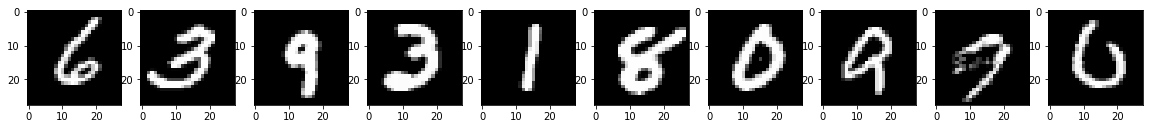

Noisy Images


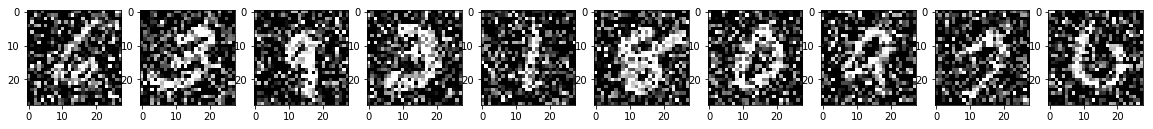

Reconstruction of Noisy Images


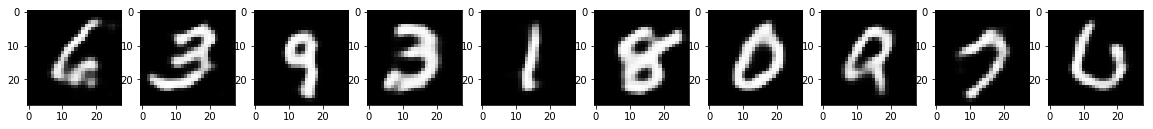

In [114]:
# Training

sess = tf.Session()
#tf.reset_default_graph()

saver = tf.train.Saver()


#tf.summary.scalar("loss", cost)
#merged_summary_op = tf.summary.merge_all()


#display_step = 1
epochs = 5
batch_size = 128
#lr=[1e-3/(2**(i//20)) for i in range(epochs)]
lr=1e-3
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs', sess.graph)
#summary_writer = tf.summary.FileWriter('./writer', graph=tf.get_default_graph())
for e in range(epochs):
    total_batch = int(mnist.train.num_examples/batch_size)
    for ibatch in range(total_batch):
        batch_x = mnist.train.next_batch(batch_size)
        batch_test_x= mnist.test.next_batch(batch_size)
        imgs_test = batch_x[0].reshape((-1, 28, 28, 1))
        noise_factor = 0.5
        x_test_noisy = imgs_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_test.shape) 
        x_test_noisy = np.clip(x_test_noisy, 0., 1.)
        imgs = batch_x[0].reshape((-1, 28, 28, 1))
        x_train_noisy = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape) 
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: x_train_noisy,
                                                         targets_: imgs,learning_rate:lr})
        batch_cost_test = sess.run(cost, feed_dict={inputs_: x_test_noisy,
                                                         targets_: imgs_test})
        
        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost),
             "Validation loss: {:.4f}".format(batch_cost_test))
    saver.save(sess, 'encode_model') 

batch_x= mnist.test.next_batch(10)
imgs = batch_x[0].reshape((-1, 28, 28, 1))
noise_factor = 0.5
x_test_noisy = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
recon_img = sess.run([decoded], feed_dict={inputs_: x_test_noisy})[0]
plt.figure(figsize=(20, 4))
plt.title('Reconstructed Images')
print("Original Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(imgs[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Noisy Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(recon_img[i, ..., 0], cmap='gray')    
plt.show()    

writer.close()

sess.close()